In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import itertools

In [2]:
data = open('lasftm_asia/lastfm_asia_edges.csv', "r")
next(data, None)
Graphtype = nx.Graph()

network = nx.parse_edgelist(data, comments='t', delimiter=',', create_using=nx.Graph())

In [3]:
print(nx.info(network))

Name: 
Type: Graph
Number of nodes: 7624
Number of edges: 27806
Average degree:   7.2943


In [28]:
# size of the network 
network.size()

27806

In [4]:
nx.is_directed(network)

False

In [82]:
# density of the nerwork
# The network is sparse 
nx.density(network)

0.0009568849118596328

In [30]:
# Eccentricity of the network 
#nx.eccentricity(network)

In [87]:
# Dimater of the network 
nx.diameter(network)

15

In [32]:
# radius of a network 
nx.radius(network)

8

In [33]:
# periphery of the network
nx.periphery(network)

['1071', '3885', '2287', '2990', '4510']

In [34]:
# average_shortest_path_length
nx.average_shortest_path_length(network)

5.232237268915701

In [35]:
nx.average_clustering(network)

0.2194184243270858

In [86]:
# Average clustering 
nx.average_clustering(network)

0.2194184243270858

In [6]:
# clustering coeffiction 
# nodes : clustering coeffition
clustering_coeffiction = nx.clustering(network)

In [29]:
degrees = dict(nx.degree(network))
uniq_degrees = set(degrees.values())

In [85]:
# degre centrlity 
degrees_cent = nx.degree_centrality(network)
sort_ = sorted(degrees_cent.values())
last10 = sort_[-10:]
nodes = []
for i in last10:
    for k, v in degrees_cent.items():
        if v == i:
            print(f'node: {k} degree centrelity: {v}')
            nodes.append(k)
            nodes = nodes[-10:]

node: 2854 degree centrelity: 0.015610651974288339
node: 6101 degree centrelity: 0.015610651974288339
node: 5127 degree centrelity: 0.015610651974288339
node: 2854 degree centrelity: 0.015610651974288339
node: 6101 degree centrelity: 0.015610651974288339
node: 5127 degree centrelity: 0.015610651974288339
node: 2854 degree centrelity: 0.015610651974288339
node: 6101 degree centrelity: 0.015610651974288339
node: 5127 degree centrelity: 0.015610651974288339
node: 3597 degree centrelity: 0.016266561721107176
node: 2510 degree centrelity: 0.018365472910927456
node: 3450 degree centrelity: 0.02085792994883904
node: 524 degree centrelity: 0.022563295290568018
node: 4785 degree centrelity: 0.022825659189295553
node: 3530 degree centrelity: 0.022956841138659322
node: 7237 degree centrelity: 0.02833530106257379


In [70]:
last10

[0.015610651974288339,
 0.015610651974288339,
 0.015610651974288339,
 0.016266561721107176,
 0.018365472910927456,
 0.02085792994883904,
 0.022563295290568018,
 0.022825659189295553,
 0.022956841138659322,
 0.02833530106257379]

In [96]:
df_degree_cent = pd.DataFrame({'Node':nodes, 'Degree centrality':last10})
df_degree_cent.sort_values(['Degree centrality'], ascending=False, axis=0)

Node  Degree centrality
9  7237           0.028335
8  3530           0.022957
7  4785           0.022826
6   524           0.022563
5  3450           0.020858
4  2510           0.018365
3  3597           0.016267
0  2854           0.015611
1  6101           0.015611
2  5127           0.015611

In [98]:
# closseness centrality 
closseness_cent = nx.closeness_centrality(network)

In [101]:
sort_cc = sorted(closseness_cent.values())
highest_cc = sort_cc[-10:]
nodes_cc = []

for j in highest_cc:
    for k, v in closseness_cent.items():
        if(j == v):
            nodes_cc.append(k)
            nodes_cc = nodes_cc[-10:]

In [107]:
df_cc = pd.DataFrame({'node':nodes_cc, 'closeness centrality':highest_cc})
df_cc.sort_values(['closeness centrality'], ascending=False).reset_index(drop=True)

node  closeness centrality
0  7199              0.290710
1  7237              0.285677
2  4356              0.281603
3  2854              0.280350
4  5454              0.279825
5  5127              0.274643
6  3544              0.273471
7  6101              0.273294
8  3450              0.272172
9  4900              0.269145

In [3]:
# beetweness centrlity 
betwenees_c = nx.betweenness_centrality(network)

In [13]:
sorted_bc = sorted(betwenees_c.values())
highest_bc = sorted_bc[-10:]
nodes_bc = []

for i in highest_bc:
    for k, v in betwenees_c.items():
        if v == i:
            nodes_bc.append(k)
            nodes_bc = nodes_bc[-10:]

In [31]:
a = nodes_bc[::-1]
a

['7199',
 '7237',
 '2854',
 '4356',
 '6101',
 '5454',
 '4338',
 '5127',
 '3450',
 '4785']

In [24]:
df_bc = pd.DataFrame({'node':nodes_bc, 'Betweness centrality':highest_bc})
df_bc = df_bc.sort_values(['Betweness centrality'], ascending=False)
df_bc

node  Betweness centrality
9  7199              0.089931
8  7237              0.085589
7  2854              0.077563
6  4356              0.067250
5  6101              0.051805
4  5454              0.043614
3  4338              0.042899
2  5127              0.038412
1  3450              0.036933
0  4785              0.034961

In [4]:
# eigenvector_centrality of the network 
eigen_centr = nx.eigenvector_centrality(network)

In [17]:
sort_ec = sorted(eigen_centr.values())
highest_ec = sort_ec[-10:]
nodes_ec = []

for p in sort_ec:
    for k, v in eigen_centr.items():
        if(v == p):
            nodes_ec.append(k)
            nodes_ec = nodes_ec[-10:]

In [23]:
df_ec = pd.DataFrame({'node':nodes_ec, 'eigenvector_centrality':highest_ec})
df_ec = df_ec.sort_values(['eigenvector_centrality'], ascending=False)
df_ec

node  eigenvector_centrality
9  7237                0.256134
8  3240                0.196578
7  3597                0.190829
6   763                0.181685
5   378                0.164246
4  2083                0.162721
3  1334                0.162531
2  3544                0.151874
1  4809                0.151282
0  2734                0.146488

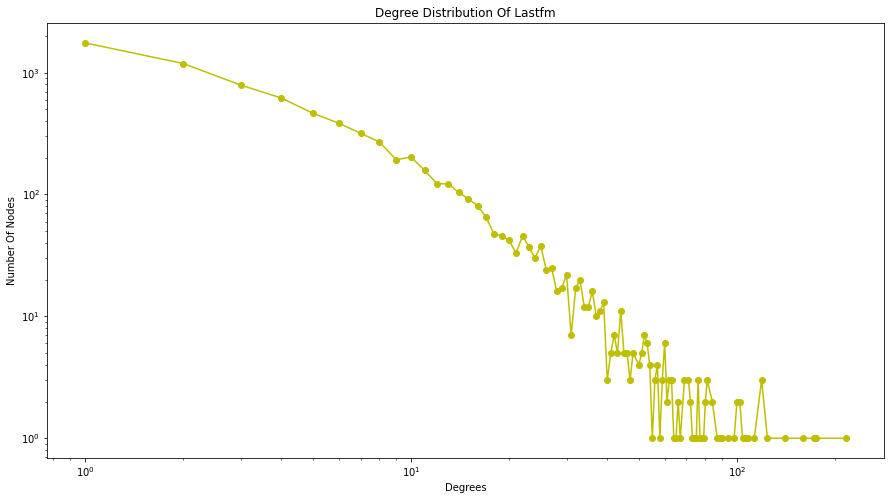

In [81]:
list_degree = list(uniq_degrees)
all_degrees = degrees.values()
y = []
for p in uniq_degrees:
    x = list(all_degrees).count(p)
    y.append(x)
    
plt.figure(figsize=(15,8))
#plt.loglog(list_degree, y, 'yo-')
plt.title("degree distribution of LastFM".title())
plt.xlabel('Degrees')
plt.ylabel('Number of Nodes'.title())
plt.show()

In [6]:
def plot_degree_dist(G):
    #plt.style.use('bmh')
    degrees = [G.degree(n) for n in G.nodes()]
    plt.figure(figsize=(12,7))
    plt.hist(degrees, color='dodgerblue', bins=15)
    plt.yscale('log')
    plt.title('Degree distribution'.title(), fontsize=15)
    plt.ylabel('Number of nodes'.title(), fontsize=14)
    plt.xlabel('Degrees', fontsize=14)
    plt.grid()
    #plt.ylim(1, max(y))
    plt.savefig('Degree distribution.png', dpi=220)
    plt.show()

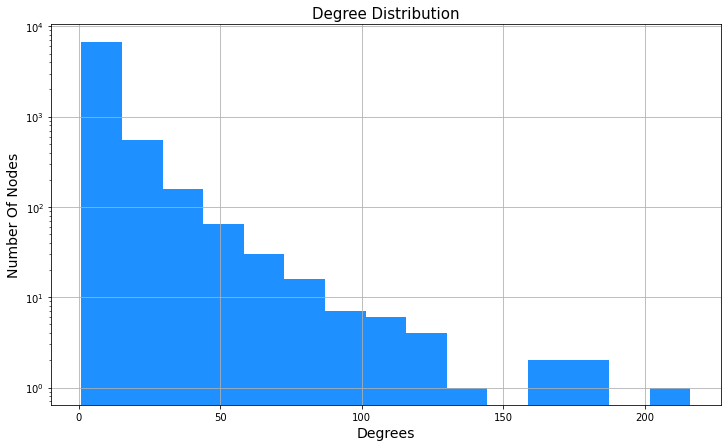

In [7]:
plot_degree_dist(network)

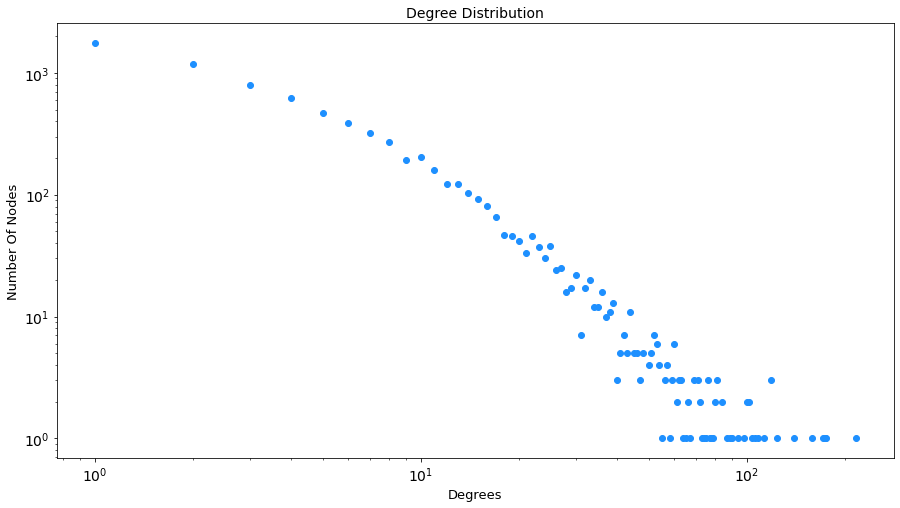

In [62]:
all_degrees = dict(nx.degree(network)).values()
uniq_degrees = list(set(all_degrees))
number_nodes = []
for degree in uniq_degrees:
    x = list(all_degrees).count(degree)
    number_nodes.append(x)
    
plt.figure(figsize=(15,8))
#plt.plot(uniq_degrees, number_nodes, color='blue')
plt.plot(uniq_degrees, number_nodes, 'o', color='dodgerblue')
plt.title('Degree distribution'.title(), fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.ylabel('Number of Nodes'.title(), fontsize=13)
plt.xlabel('Degrees'.title(), fontsize=13)
plt.yscale('log')
plt.xscale('log')
plt.savefig('degree distribution_hubs.png', dpi=220)
plt.show()

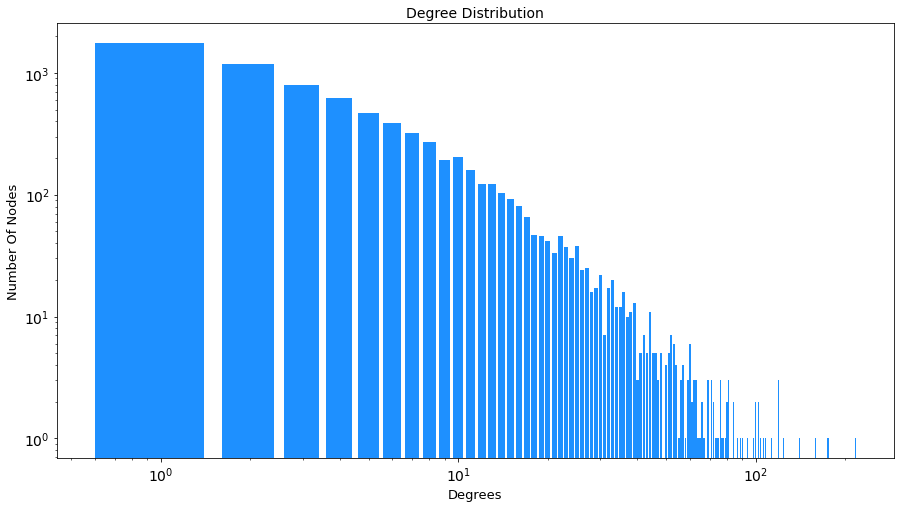

In [5]:
all_degrees = dict(nx.degree(network)).values()
uniq_degrees = list(set(all_degrees))
number_nodes = []
for degree in uniq_degrees:
    x = list(all_degrees).count(degree)
    number_nodes.append(x)
    
plt.figure(figsize=(15,8))
#plt.plot(uniq_degrees, number_nodes, color='blue')
plt.bar(uniq_degrees, number_nodes, color='dodgerblue')
plt.title('Degree distribution'.title(), fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.ylabel('Number of Nodes'.title(), fontsize=13)
plt.xlabel('Degrees'.title(), fontsize=13)
plt.yscale('log')
plt.xscale('log')
plt.savefig('degree distribution_hubs.png', dpi=220)
plt.show()

In [73]:
def plot_degrees_distri(network):
    degrees = dict(nx.degree(network)).values()
    #degrees = degrees.values()
    uniq_degrees = list(set(degrees))
    
    y = []
    for i in uniq_degrees:
        x = list(degrees).count(i)
        y.append(x)
        
    plt.figure(figsize=(15,7))
    plt.bar(uniq_degrees, y)
    #plt.yscale('log')
    plt.show()

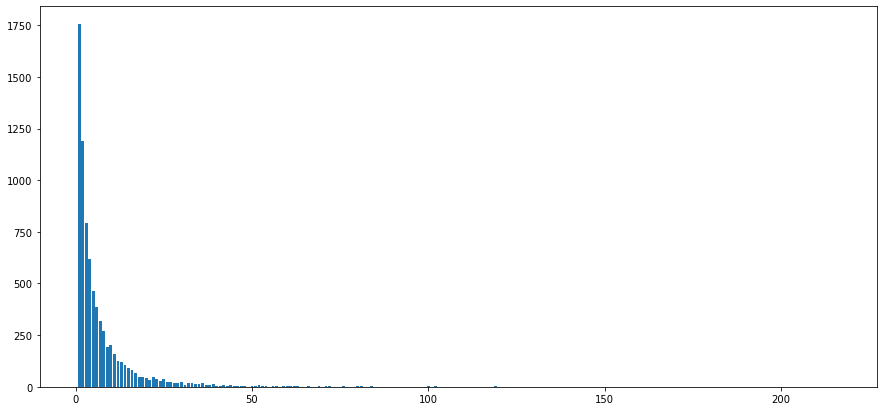

In [74]:
plot_degrees_distri(network)

In [4]:
pos = nx.spring_layout(network)

KeyboardInterrupt: 

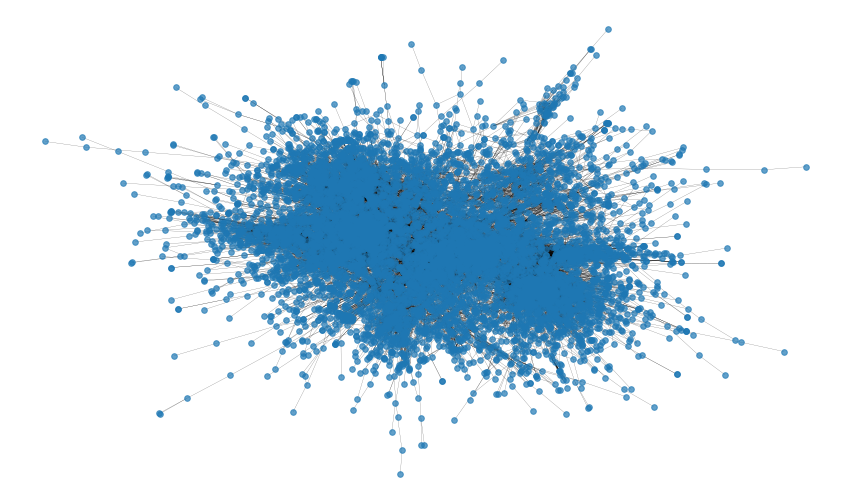

In [26]:
plt.figure(figsize=(15,9))
plt.axis('off')
nx.draw_networkx(network, pos=pos, with_labels=False, node_size=32, alpha=.7, width=0.2)

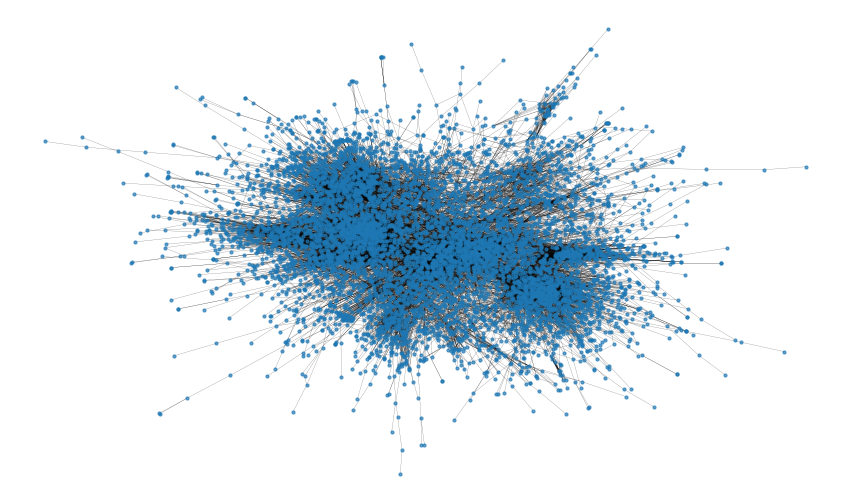

In [12]:
plt.figure(figsize=(15,9))
plt.axis('off')
nx.draw_networkx(network, pos=pos, with_labels=False, node_size=10, alpha=.7, width=0.2)

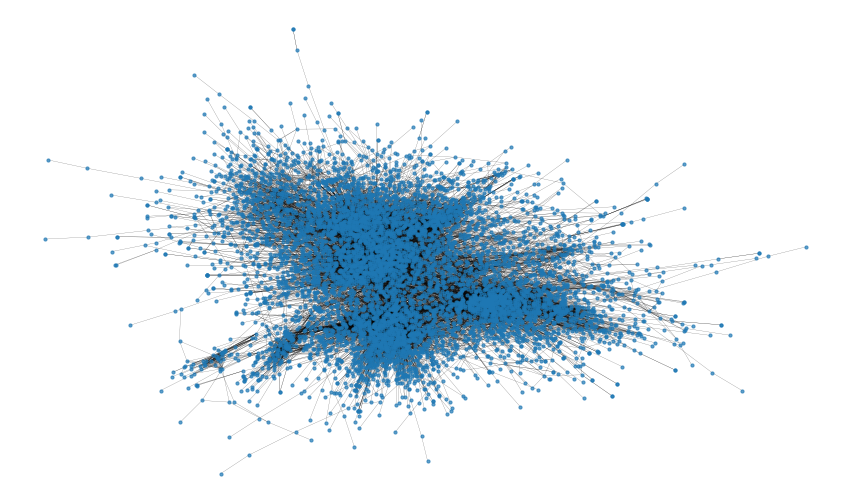

In [24]:
plt.figure(figsize=(15,9))
plt.axis('off')
nx.draw_networkx(network, pos=pos2, with_labels=False, node_size=10, alpha=.7, width=0.2)

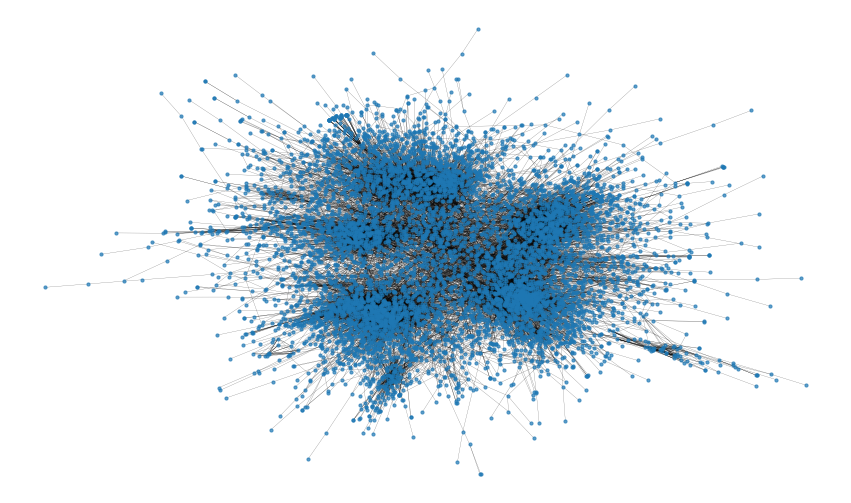

In [25]:
plt.figure(figsize=(15,9))
plt.axis('off')
nx.draw_networkx(network, pos=pos_, with_labels=False, node_size=10, alpha=.7, width=0.2)

In [37]:
"""plt.figure(figsize=(15,9))
plt.axis('equal')
nx.draw_kamada_kawai(network, node_size=20, width=0.1, with_labels=False)
plt.show() """

"plt.figure(figsize=(15,9))\nplt.axis('equal')\nnx.draw_kamada_kawai(network, node_size=20, width=0.1, with_labels=False)\nplt.show() "

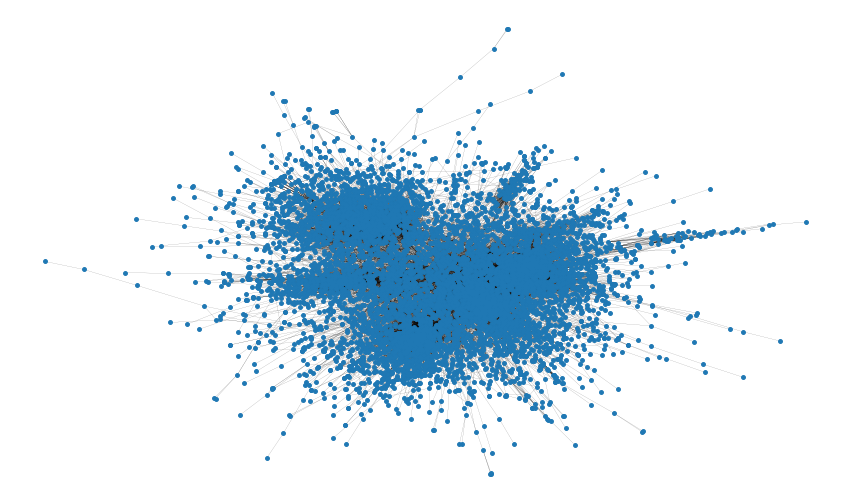

In [6]:
plt.figure(figsize=(15,9))
plt.axis('off')


nx.draw_networkx_nodes(network, pos, node_size=15)
nx.draw_networkx_edges(network, pos, width=0.09)

plt.savefig('first_graph.png', dpi=150)
plt.show()

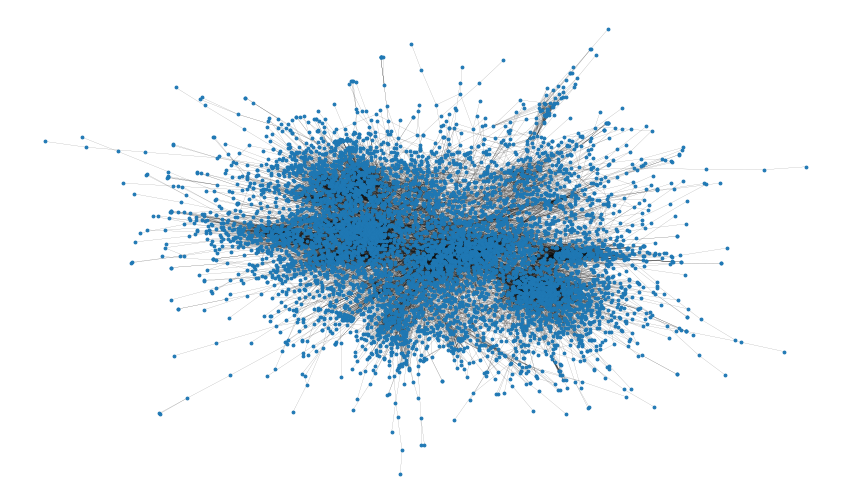

In [10]:
plt.figure(figsize=(15,9))
plt.axis('off')


nx.draw_networkx_nodes(network, pos, node_size=8)
nx.draw_networkx_edges(network, pos, width=0.09)

#plt.savefig('first_graph.png', dpi=150)
plt.show()

In [5]:
# check if the graph if planar
nx.check_planarity(network)

(False, None)

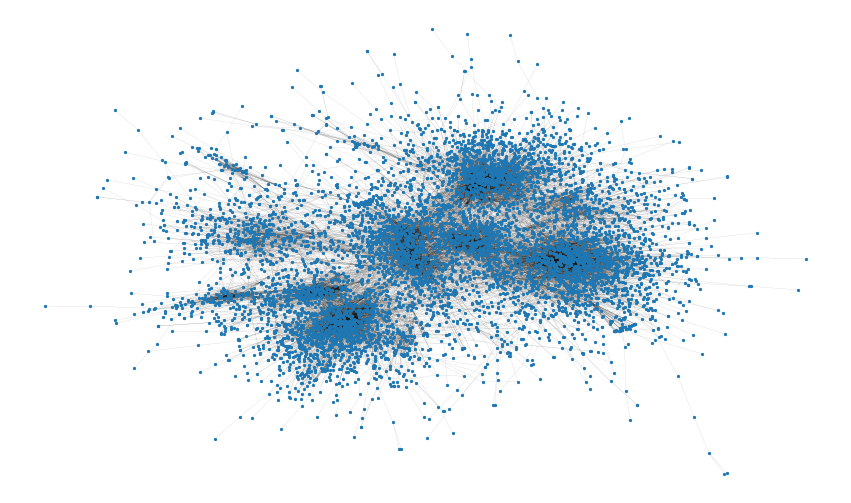

In [10]:
plt.figure(figsize=(15,9))
plt.axis('off')


nx.draw_networkx_nodes(network, pos, node_size=5)
nx.draw_networkx_edges(network, pos, width=0.05)

plt.show()

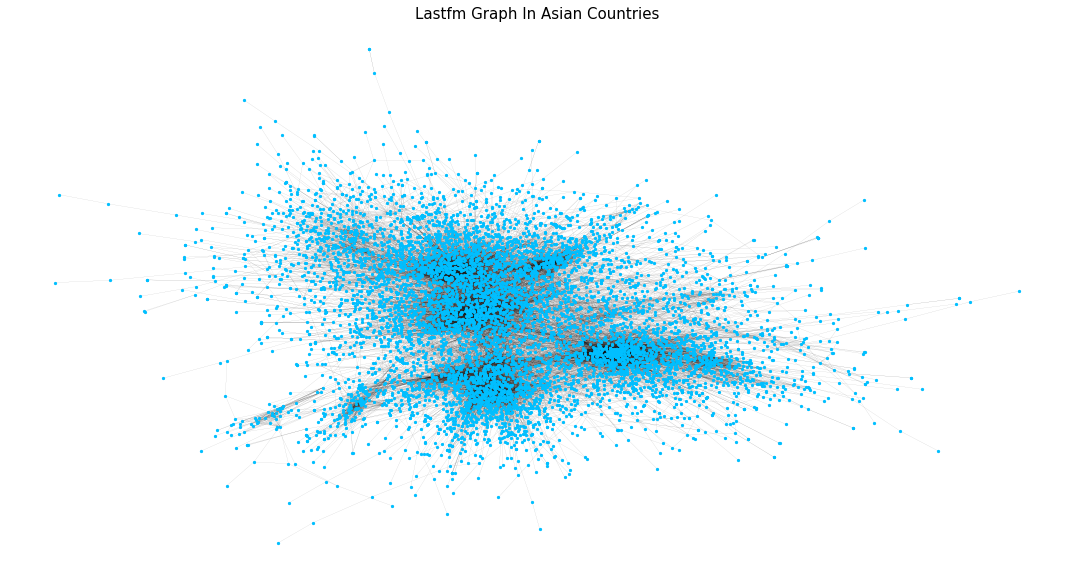

In [46]:
plt.figure(figsize=(19,10))
plt.axis('off')

plt.title("Lastfm graph in asian countries".title(), fontsize=15)
nx.draw_networkx_nodes(network, pos2, node_size=5, node_color="deepskyblue")
nx.draw_networkx_edges(network, pos2, width=0.05, alpha=.9)
plt.savefig('first_image.png', dpi=250)
plt.show()

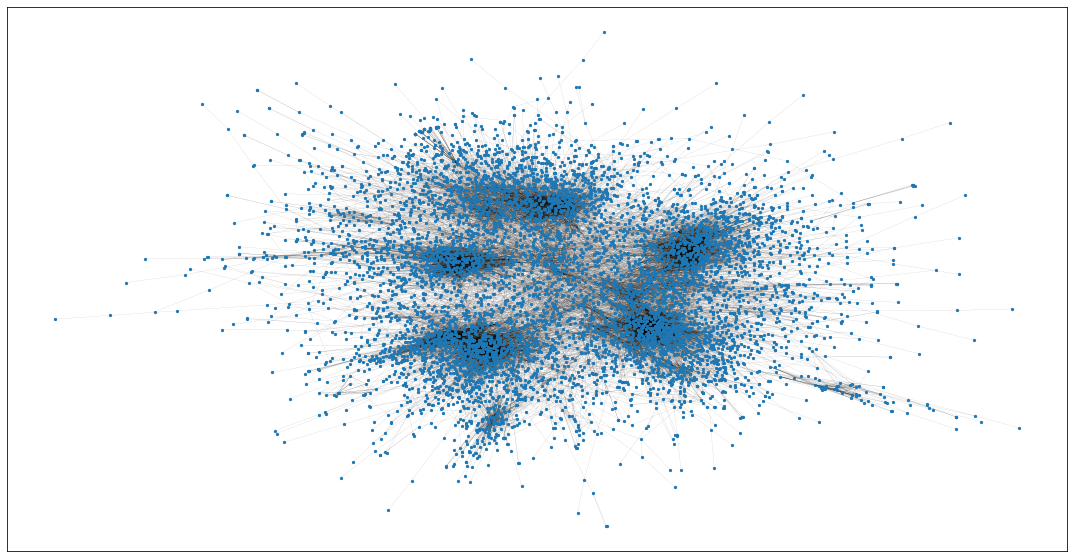

In [23]:
plt.figure(figsize=(19,10))
#plt.axis('off')


nx.draw_networkx_nodes(network, pos_, node_size=5)
nx.draw_networkx_edges(network, pos_, width=0.05)

plt.show()

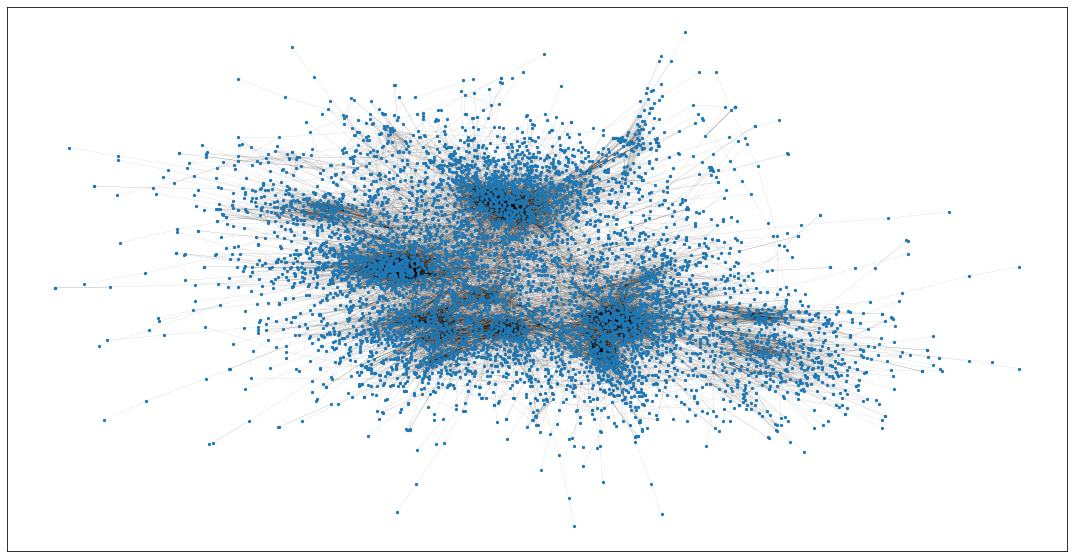

In [104]:
plt.figure(figsize=(19,10))
#plt.axis('off')


nx.draw_networkx_nodes(network, pos_, node_size=5)
nx.draw_networkx_edges(network, pos_, width=0.05)

plt.show()

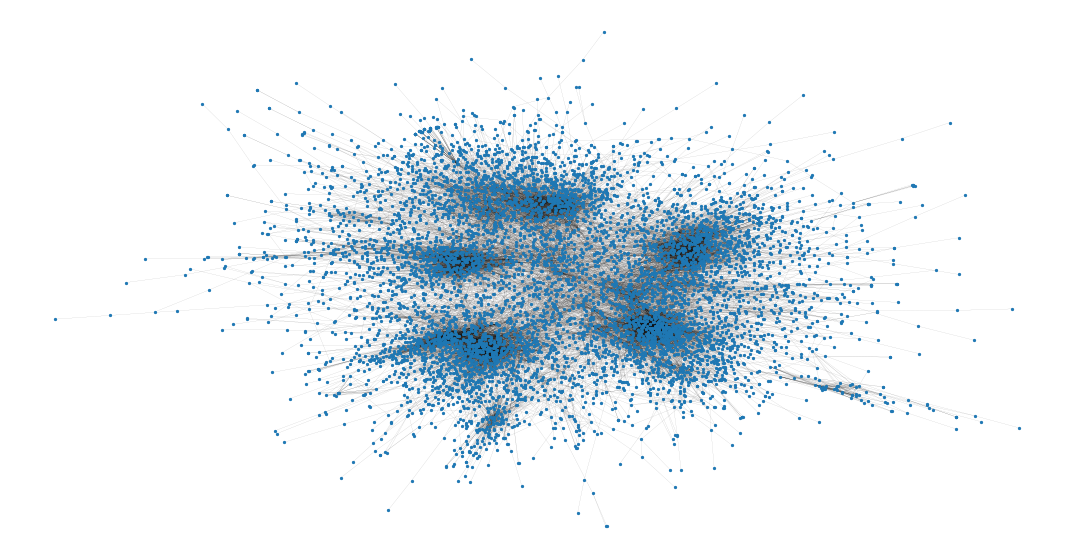

In [27]:
plt.figure(figsize=(19,10))
plt.axis('off')


nx.draw_networkx_nodes(network, pos_, node_size=5)
nx.draw_networkx_edges(network, pos_, width=0.05)
plt.savefig("second_Maciza.png")
plt.show()

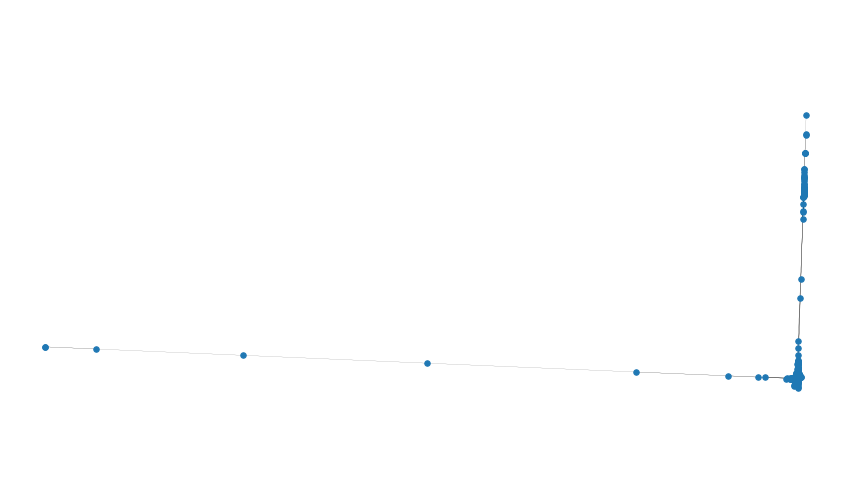

In [49]:
plt.figure(figsize=(15,9))
plt.axis('off')
nx.draw_spectral(network, node_size=50, width=0.1, with_labels=False)
plt.show()

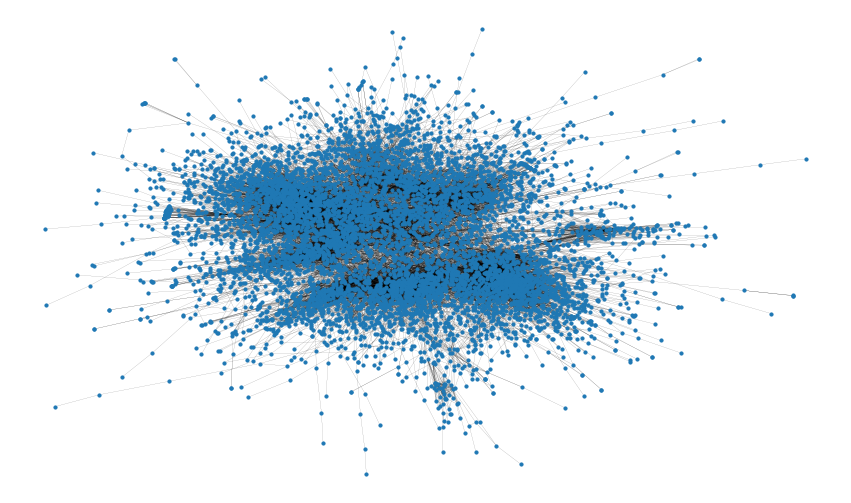

In [15]:
plt.figure(figsize=(15,9))
plt.axis('off')
nx.draw_spring(network, node_size=10, width=0.09, with_labels=False)
plt.show()

In [77]:
pos2 = nx.fruchterman_reingold_layout(network)

In [5]:
pos_ = nx.spring_layout(network)

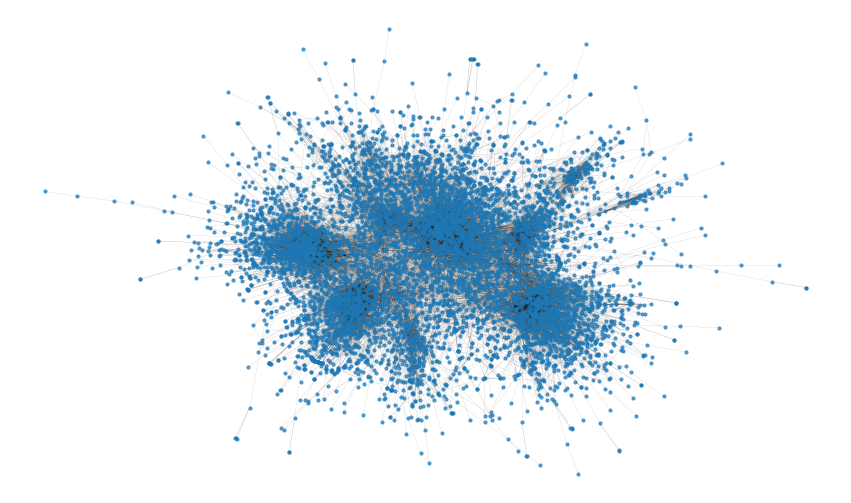

In [13]:
plt.figure(figsize=(15,9))
plt.axis('off')
nx.draw_networkx(network, pos=pos2, with_labels=False, node_size=10, alpha=.7, width=0.08)

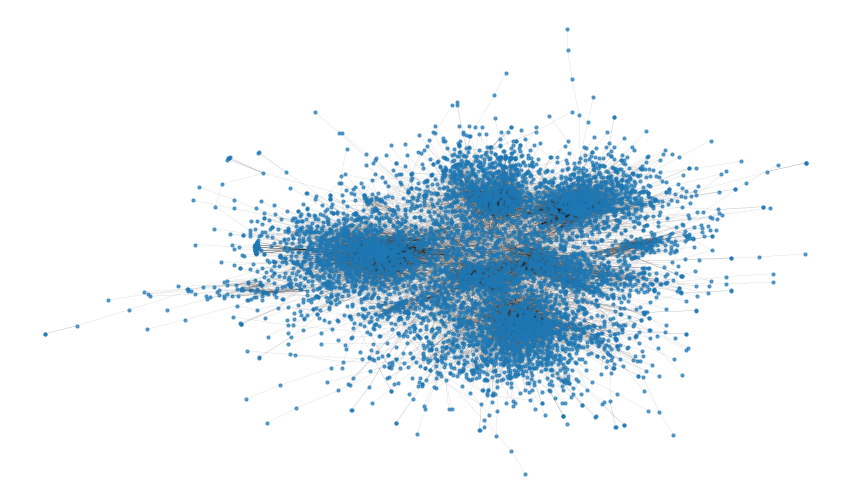

In [17]:
plt.figure(figsize=(15,9))
plt.axis('off')
nx.draw_networkx(network, pos=pos_, with_labels=False, node_size=10, alpha=.7, width=0.08)

In [8]:
betweenness_centrality = nx.betweenness_centrality(network)

In [66]:
bisections = nx.algorithms.community.kernighan_lin_bisection(network)

In [67]:
dcolors = {
        0:'blue',
    1:'red',
    2:'yellow',
    3:'purple',
    4:'orange'
}

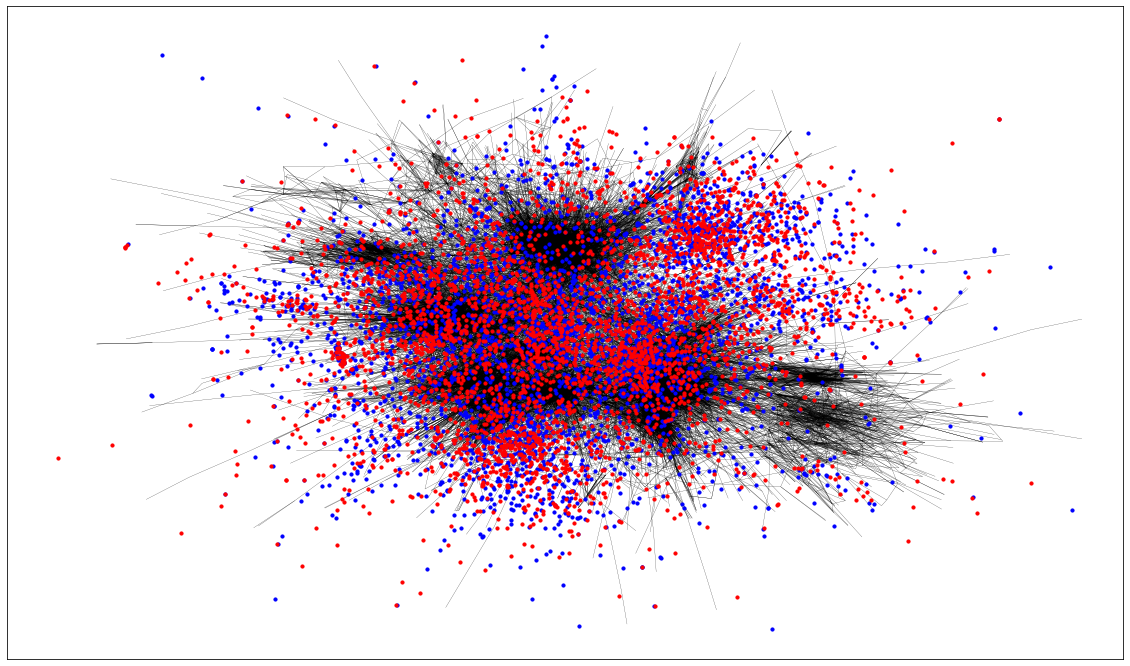

In [75]:
fig1, ax1 = plt.subplots(figsize=(20,12))
for idx, sub_c in enumerate(bisections):
    nx.draw_networkx_nodes(network, pos, nodelist=sub_c, node_size=10, node_color=dcolors[idx], ax=ax1)
nx.draw_networkx_edges(network, pos_, edgelist=network.edges, width=0.2)
plt.show()

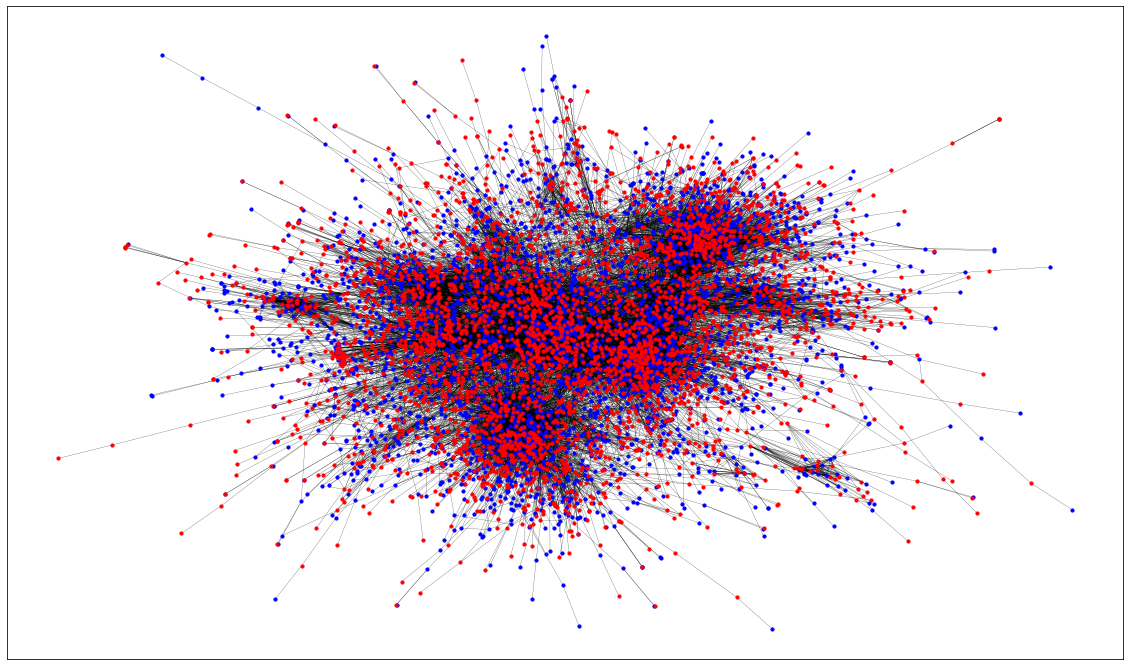

In [76]:
fig1, ax1 = plt.subplots(figsize=(20,12))
for idx, sub_c in enumerate(bisections):
    nx.draw_networkx_nodes(network, pos, nodelist=sub_c, node_size=10, node_color=dcolors[idx], ax=ax1)
nx.draw_networkx_edges(network, pos, edgelist=network.edges, width=0.2)
plt.show()

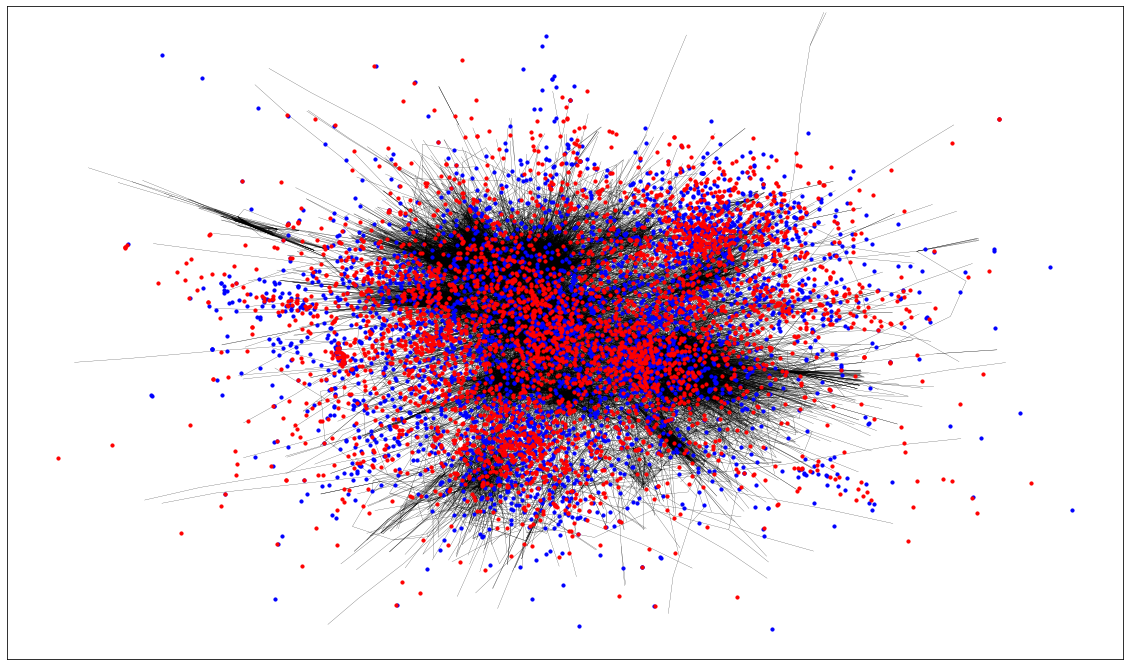

In [78]:
fig1, ax1 = plt.subplots(figsize=(20,12))
for idx, sub_c in enumerate(bisections):
    nx.draw_networkx_nodes(network, pos, nodelist=sub_c, node_size=10, node_color=dcolors[idx], ax=ax1)
nx.draw_networkx_edges(network, pos2, edgelist=network.edges, width=0.2)
plt.show()

In [6]:
communities  = nx.algorithms.community.centrality.girvan_newman(network)

In [ ]:
modula = nx.algorithms.community.quality.modularity(karate_club, l1[0])

In [ ]:
plt.figure(figsize=(10, 6))
for com in l1:
    for idc, com_ in enumerate(com):
        nx.draw_networkx_nodes(karate_club, pos, nodelist=com_, node_color=dcolors[idc])
    nx.draw_networkx_edges(karate_club, pos, edgelist=karate_club.edges)

In [7]:
communities  = nx.algorithms.community.greedy_modularity_communities(network)

In [8]:
len(communities)

43

In [33]:
colors = {0: 'rebeccapurple',
         1: 'red',
         2: 'orangered',
         3: 'silver',
         4: 'dodgerblue',
         5: 'bisque',
         6: 'gold',
         7: 'olive',
         8: 'olivedrab',
         9: 'greenyellow',
         10: 'darkseagreen',
         11: 'palegreen',
         12: 'forestgreen',
         13: 'darkgreen',
         14: 'lime',
         15: 'springgreen',
         16: 'aquamarine',
         17: 'turquoise',
         18: 'lightseagreen',
         19: 'teal',
         20: 'cyan',
         21: 'skyblue',
         22: 'steelblue',
         23: 'slategray',
         24: 'royalblue',
         25: 'lavender',
         26: 'midnightblue',
         27: 'navy',
         28: 'blue',
         29: 'slateblue',
         30: 'darkslateblue',
         31: 'mediumslateblue',
         32: 'mediumpurple',
         33: 'thistle',
         34: 'plum',
         35: 'violet',
         36: 'fuchsia',
         37: 'orchid',
         38: 'mediumvioletred',
         39: 'orchid',
         40: 'deeppink',
         41: 'white',
         42: 'crimson',
         43: 'darkkhaki'}

In [99]:
pos3 = nx.lay(network)

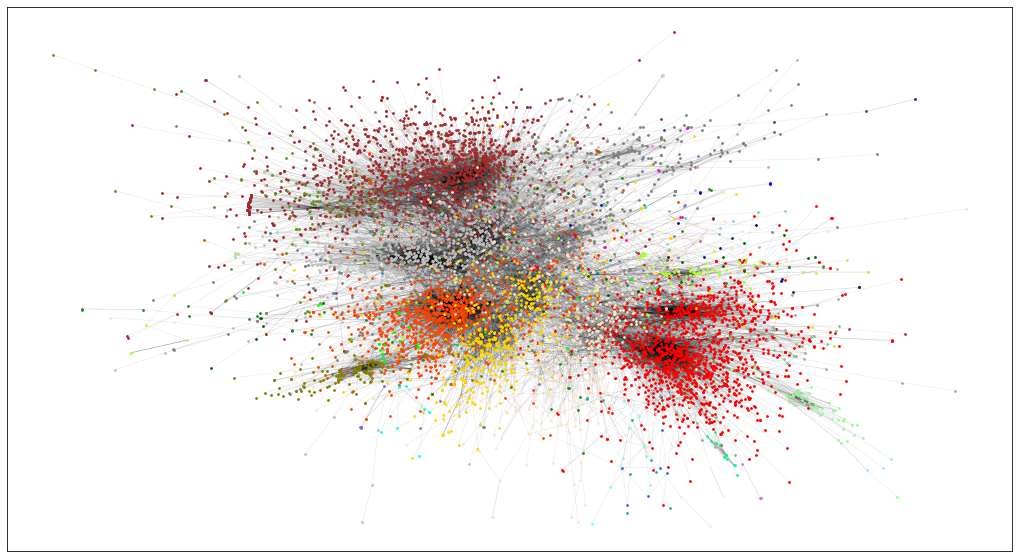

In [17]:
fig, ax = plt.subplots(figsize=(18, 10))

for idc, com_ in enumerate(communities):
    #pos4 = nx.spring_layout(network.subgraph(com_))
    nx.draw_networkx_nodes(network, pos_, nodelist=com_, node_color=colors[idc], node_size=3)
nx.draw_networkx_edges(network, pos_, edgelist=network.edges, width=.5, alpha=0.1)
plt.show()

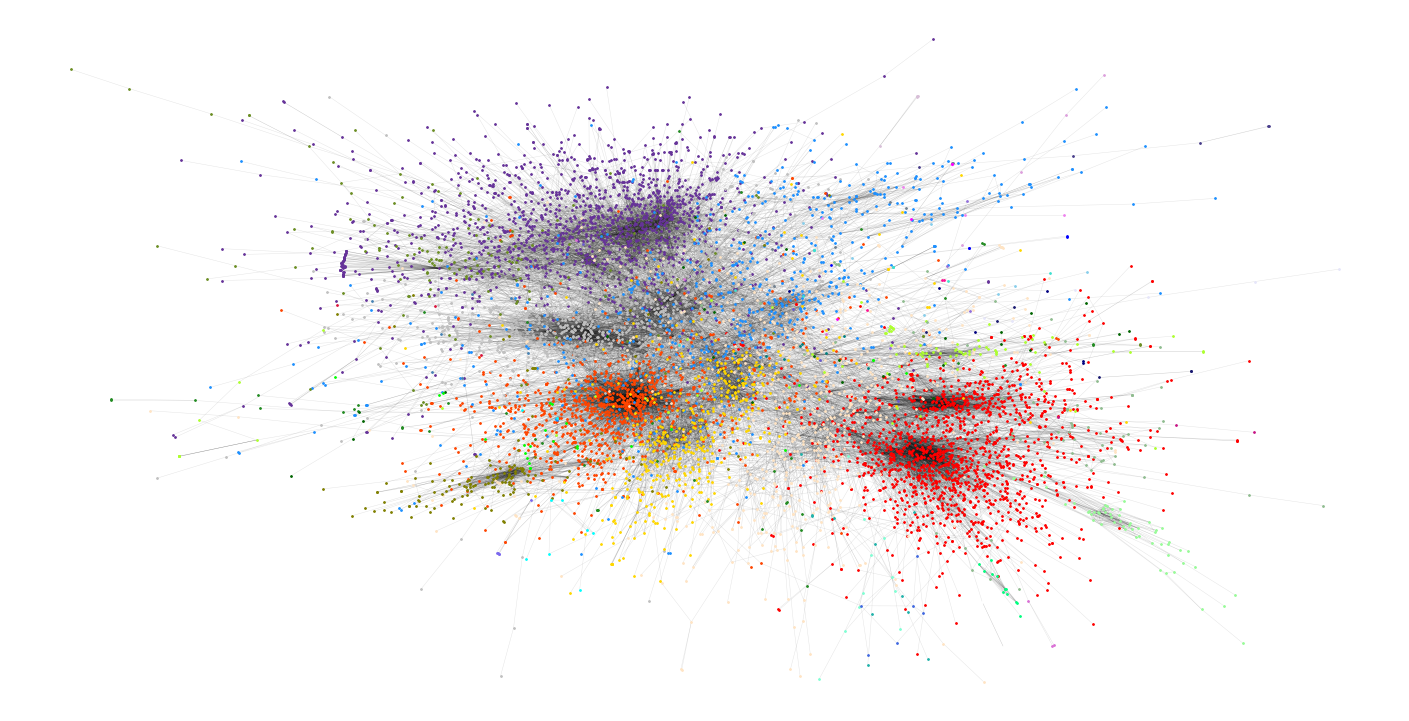

In [34]:
fig, ax = plt.subplots(figsize=(25, 13))

for idc, com_ in enumerate(communities):
    #pos4 = nx.spring_layout(network.subgraph(com_))
    nx.draw_networkx_nodes(network, pos_, nodelist=com_, node_color=colors[idc], node_size=3)
plt.axis('off')
nx.draw_networkx_edges(network, pos_, edgelist=network.edges, width=.5, alpha=0.1)
plt.savefig('communities.png')
plt.show()

In [44]:
all_degree = dict(nx.degree(network)).values()

In [48]:
max(list(all_degree))

216